In [1]:
import numpy as np
import sys
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/stella/')
sys.path.insert(1, '/Users/azib/Documents/open_source/nets2/scripts/')
from utils import *
import matplotlib as plt
from scipy.stats import skewnorm

In [14]:
def skewed_gaussian(x,alpha,t0,sigma,A):
    """Creates a skewned Gaussian model transit.
    
    Parameters:
        x: Flux array.
        A: Amplitude of the Gaussian.
        t0: Mean of the Gaussian.
        sigma: Standard deviation of the Gaussian.
        alpha: Skewness parameter (positive for right-skewed, negative for left-skewed).

    Returns:
        y: The value of the skewed Gaussian at each input data point x.
    
    
    """
    pdf = skewnorm.pdf(x, alpha, loc=t0, scale=sigma)
    normalized_pdf = pdf / pdf.max()  # Normalize so the peak is 1
    return 1 - A * normalized_pdf  # Subtract from 1 to create a dip

In [4]:
lc, info = import_lightcurve('../data/eleanor/s0007/hlsp_gsfc-eleanor-lite_tess_ffi_s0007-0000000107091580_tess_v1.0_lc.fits')

In [5]:
import matplotlib.pyplot as plt

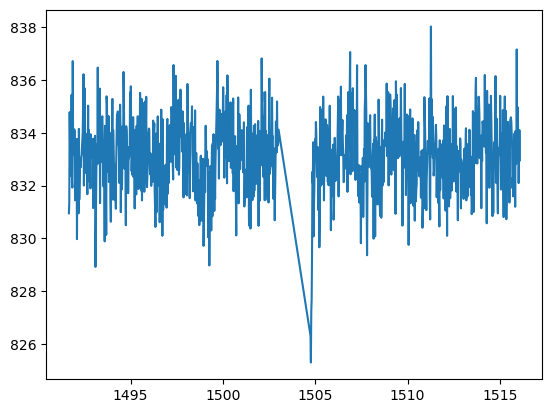

In [5]:
plt.plot(lc['TIME'],lc['PCA_FLUX'])

In [9]:
def gauss(t, A, t0, sigma):
    """
    Creates a Gaussian function.

    Parameters:
        :t (float or array): Time or array of times at which to evaluate the Gaussian function.
        :A (float): Amplitude of the Gaussian peak.
        :t0 (float): Mean or centre of the Gaussian distribution.
        :sigma (float): Standard deviation or width of the Gaussian distribution.

    Returns:
        float or array: Value of the Gaussian function at the given time(s).


    Notes:
        To maintain asymmetry in the exocomet direction, always have sigma tail > sigma.
    """

    return abs(A) * np.exp(-((t - t0) ** 2) / (2 * sigma**2))

def comet_curve(t, A, t0, sigma=3.28541476e-01, tail=3.40346173e-01):
    ### add the Beta Pic parameters
    """
    Creates an exocomets light curve model.

    Notes: These are the Beta Pic parameters:
        - A = 8.84860547e-04, t0 = 1.48614591e+03, sigma = 3.28541476e-01, alpha (skewness) = 1.43857307e+00, tail = 3.40346173e-01

    Parameters:
        t (array): Independent variable (time) values.
        A (float): Amplitude of the Gaussian curve.
        t0 (float): Mean (centre) of the Gaussian curve.
        sigma (float): Standard deviation of the Gaussian curve.
        tail (float): Tail parameter controlling decay rate after t0.

    Returns:
        array: The computed values of the asymmetric Gaussian."""

    x = np.zeros(len(t))
    for i in range(len(t)):
        if t[i] < t0:
            x[i] = gauss(t[i], A, t0, sigma)
        else:
            x[i] = A * math.exp(-abs(t[i] - t0) / tail)

    return x

In [2]:
def skewed_gaussian(x, alpha=0, t0=1496.5, sigma=1, depth=0.001):
    """Creates a skewed Gaussian model transit.

    Parameters:
        x: Time array.
        alpha: Skewness parameter (0 for symmetric).
        t0: Mean of the Gaussian.
        sigma: Standard deviation of the Gaussian.
        depth: Transit depth.

    Returns:
        y: The value of the skewed Gaussian at each input data point x.
    """
    pdf = skewnorm.pdf(x, alpha, loc=t0, scale=sigma)
    normalized_pdf = pdf / pdf.max()
    return 1 - (depth * normalized_pdf)

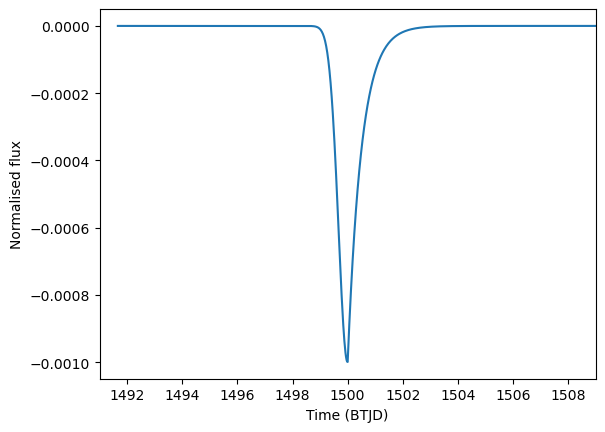

In [26]:
x = np.arange(lc['TIME'][0],lc['TIME'][-1],0.02)
alpha = 0  # Skewness parameter (0 for symmetric)
t0 = 1500     # Mean of the Gaussian
#sigma = 1  # Duration
A = 0.001      # Amplitude of the Gaussian
tail=0.5

# Generate Gaussian
y = -comet_curve(x, A, t0, tail=tail)

# Plot
plt.plot(x, y)
#plt.title('Symmetric Gaussian with alpha=0')
# plt.xlabel('x')
# plt.axvline(x[np.argmin(y)],linestyle='--',zorder=1,c='red')
# plt.axvline(x[np.argmin(y)]+2.5)

plt.xlim([1491,1509])
plt.ylabel('Normalised flux')
plt.xlabel('Time (BTJD)')
#plt.title('Negative Skew Transit')
plt.savefig('../negative-exocomet.png',dpi=200)
plt.show()

In [11]:
import math